## Arrested Ekman Layers 

This notebook contains estimations of the time it takes for the bottom Ekman layers to shut down at different parts of the bathymetry according to the theory developed by MacCready and Rhines, 1991.

The time it takes for the bottom Ekman layer to shut down is given by:

$$\tau_s = \frac{1}{S f \cos {\alpha} (1+S)}$$

where, 

$$S = (\frac{N \sin {\alpha}}{f \cos {\alpha}})^2 $$.

Here, N is the Brunt-Vaisala frequency, \alpha is the slope and f is the rotation rate or Coriolis parameter.

The values for the base case runs are: $N = 5.5\times10^{-3}s^{-1}$, $f = 9.66\times10^{-5}s^{-1}$. The slopes at different areas of the domain are

|Area |$\Delta z$ (m)|$\Delta y$ (m)|$\alpha=\Delta z/\Delta y$|$\tau_s$ (s)|$\tau_s$ (min)|
|-----|------------|----------------|--------------------------|------------|--------------|
|Axis |950         |10000     |  0.095   |11.61      | 0.19     
|Slope|950         |25000     |  0.038   |388.88     | 6.48
|Shelf|100         |20000     |  0.005   |118158.98  | 1969.32 = 1.37 days


In [1]:
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

%matplotlib inline

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:

Dz = np.array([950,950,100])
Dy = np.array([10000,25000,20000])
alpha = Dz/Dy

# Base case values
N = 5.5E-3
f = 9.66E-5


S = ((N*np.sin(alpha))/(f*np.cos(alpha)))**2
T = 1/(S*f*np.cos(alpha)*(1+S))

In [12]:
# Changing N and f

NN = np.array([3.0E-3,3.9E-3,5.5E-3,6.3E-3,5.5E-3,5.5E-3])
ff = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,7.68E-5,4.84E-5])

SS = np.empty((len(NN),len(alpha)))
TT = np.empty((len(NN),len(alpha)))

for aa,ii in zip(alpha, range(len(alpha))):
    SS[:,ii] = ((NN*np.sin(aa))/(ff*np.cos(aa)))**2
    TT[:,ii] = 1/(SS[:,ii]*ff*np.cos(aa)*(1+SS[:,ii]))
    


In [14]:
print(SS)
print(TT)

[[  8.75697256e+00   1.39403498e+00   2.41121260e-02]
 [  1.47992836e+01   2.35591912e+00   4.07494929e-02]
 [  2.94331578e+01   4.68550646e+00   8.10435345e-02]
 [  3.86182490e+01   6.14769426e+00   1.06334475e-01]
 [  4.65659718e+01   7.41290362e+00   1.28218351e-01]
 [  1.17246635e+02   1.86646595e+01   3.22835959e-01]]
[[  1.21707267e+02   3.10407600e+03   4.19223182e+05]
 [  4.44741333e+01   1.31028162e+03   2.44095564e+05]
 [  1.16091843e+01   3.88875705e+02   1.18158983e+05]
 [  6.79669415e+00   2.35753572e+02   8.79969791e+04]
 [  5.90522491e+00   2.08938344e+02   9.00120937e+04]
 [  1.49702195e+00   5.63328565e+01   4.83807028e+04]]


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


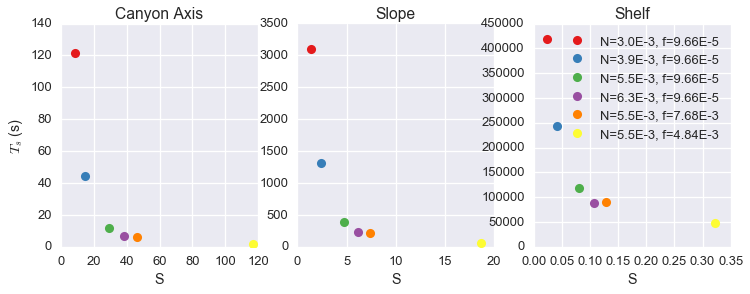

In [38]:
sns.set_context('talk')
sns.set_palette('Set1')
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 4))

labels = ['N=3.0E-3, f=9.66E-5','N=3.9E-3, f=9.66E-5','N=5.5E-3, f=9.66E-5',
          'N=6.3E-3, f=9.66E-5','N=5.5E-3, f=7.68E-3','N=5.5E-3, f=4.84E-3']
for jj in range(len(SS[:,1])):
    
    ax1.plot(SS[jj,0],TT[jj,0],'o',label=labels[jj])
    ax2.plot(SS[jj,1],TT[jj,1],'o',label=labels[jj])
    ax3.plot(SS[jj,2],TT[jj,2],'o',label=labels[jj])

ax1.set_title('Canyon Axis')
ax2.set_title('Slope')
ax3.set_title('Shelf')

ax1.set_xlabel('S')
ax2.set_xlabel('S')
ax3.set_xlabel('S')

ax1.set_ylabel('$T_s$ (s)')

ax3.legend(loc=0)

**Key points**

* Ekman layers over the canyon axis (canyon walls have slighter smaller slopes but they are bounded by axis and slope) shut down, at longest after 120s. 

* At all locations, the longest times correspond to small values of S, that in this case correspond to lower stratifications. Increasing stratification and lowering the rotation rate increase S, decreasing the shutdouwn time. 

* The longest shustdown times correspond to the shelf, which has the smallest slope values. The longest time is about 111 days for very low stratification! 

* The longest time for the slope is about 1 hour.
